In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        



/kaggle/input/walmart-sales-dataset/walmart.csv


In [2]:
df = pd.read_csv('/kaggle/input/walmart-sales-dataset/walmart.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [4]:
unique_occupations = df['Occupation'].unique()
print(unique_occupations)


[10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]


In [5]:
occupation_counts = df['Occupation'].value_counts()
print(occupation_counts)


Occupation
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: count, dtype: int64


Unique Occupation Codes:
[10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
Average Purchase by Occupation:
    Occupation     Purchase
0            0  9124.428588
1            1  8953.193270
2            2  8952.481683
3            3  9178.593088
4            4  9213.980251
5            5  9333.149298
6            6  9256.535691
7            7  9425.728223
8            8  9532.592497
9            9  8637.743761
10          10  8959.355375
11          11  9213.845848
12          12  9796.640239
13          13  9306.351061
14          14  9500.702772
15          15  9778.891163
16          16  9394.464349
17          17  9821.478236
18          18  9169.655844
19          19  8710.627231
20          20  8836.494905


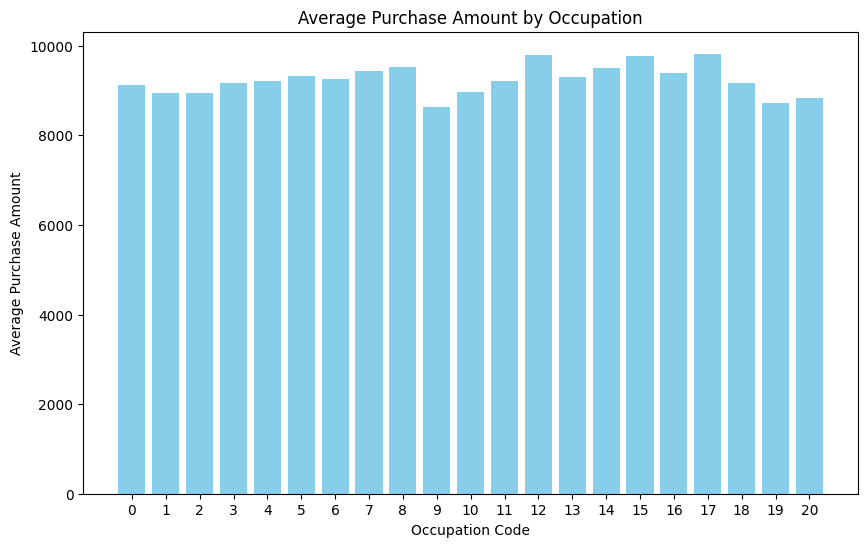

In [6]:

unique_occupations = df['Occupation'].unique()
print('Unique Occupation Codes:')
print(unique_occupations)

purchase_by_occupation = df.groupby('Occupation')['Purchase'].mean().reset_index()
print('Average Purchase by Occupation:')
print(purchase_by_occupation)


plt.figure(figsize=(10, 6))
plt.bar(purchase_by_occupation['Occupation'], purchase_by_occupation['Purchase'], color='skyblue')
plt.xlabel('Occupation Code')
plt.ylabel('Average Purchase Amount')
plt.title('Average Purchase Amount by Occupation')
plt.xticks(purchase_by_occupation['Occupation'])
plt.show()



In [7]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


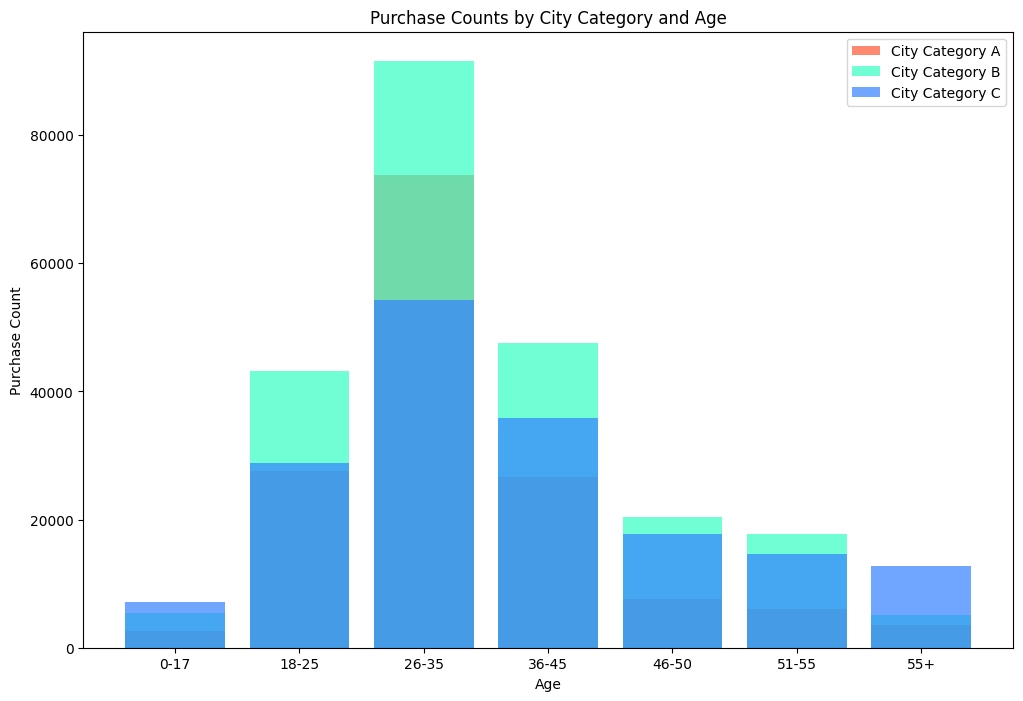

In [8]:
#finding purchase counts by city category and age

purchase_counts = df.groupby(['City_Category', 'Age'])['Purchase'].count().reset_index(name='Purchase_Count')
plt.figure(figsize=(12, 8))
colors = ['#FF5733', '#33FFC4', '#3380FF']  # Choose visually appealing colors for city categories
for i, city_category in enumerate(purchase_counts['City_Category'].unique()):
    city_data = purchase_counts[purchase_counts['City_Category'] == city_category]
    plt.bar(city_data['Age'], city_data['Purchase_Count'], color=colors[i], alpha=0.7, label=f'City Category {city_category}')
plt.xlabel('Age')
plt.ylabel('Purchase Count')
plt.title('Purchase Counts by City Category and Age')
plt.legend()
plt.show()





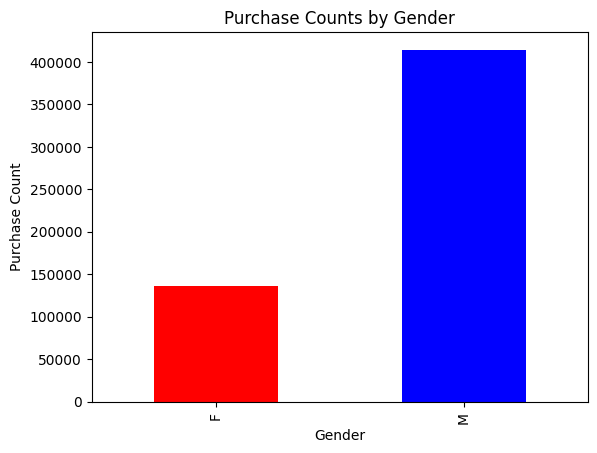

In [9]:
#finding purchase counts by gender

purchase_counts = df['Purchase'].groupby(df['Gender']).count()
max_purchases_gender = purchase_counts.idxmax()
purchase_counts.plot(kind='bar', color=['red', 'blue'])
plt.title('Purchase Counts by Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase Count')
plt.show()


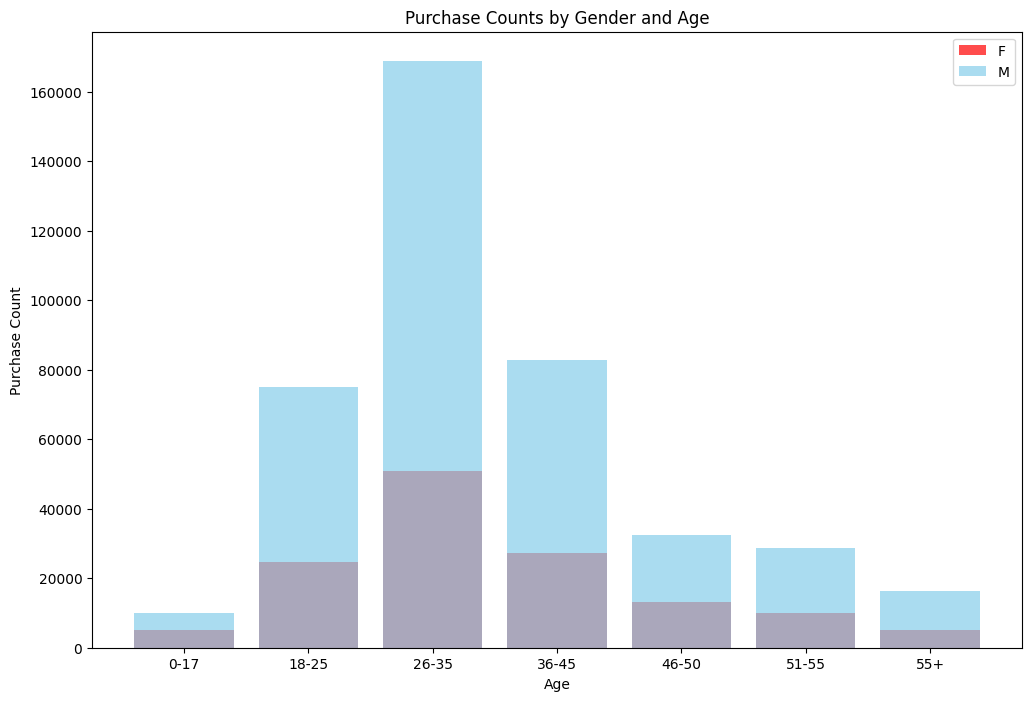

In [10]:
#finding purchase counts by gender and age

purchase_counts = df.groupby(['Gender', 'Age'])['Purchase'].count().reset_index(name='Purchase_Count')
plt.figure(figsize=(12, 8))
colors = {'M': 'skyblue', 'F': 'red'} 
for gender in purchase_counts['Gender'].unique():
    gender_data = purchase_counts[purchase_counts['Gender'] == gender]
    plt.bar(gender_data['Age'], gender_data['Purchase_Count'], color=colors[gender], alpha=0.7, label=gender)
plt.xlabel('Age')
plt.ylabel('Purchase Count')
plt.title('Purchase Counts by Gender and Age')
plt.legend()
plt.show()



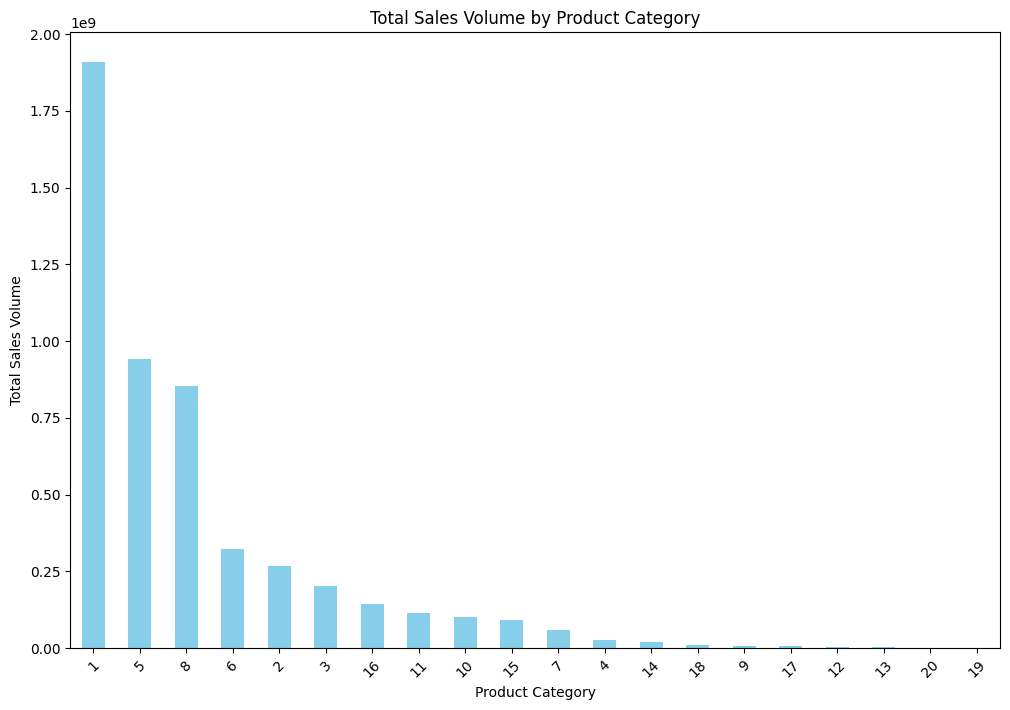

The most selling product category is: 1


In [11]:
#finding the most selling product category

category_sales = df.groupby('Product_Category')['Purchase'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
category_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales Volume by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Volume')
plt.xticks(rotation=45)
plt.show()
most_selling_category = category_sales.idxmax()
print(f"The most selling product category is: {most_selling_category}")





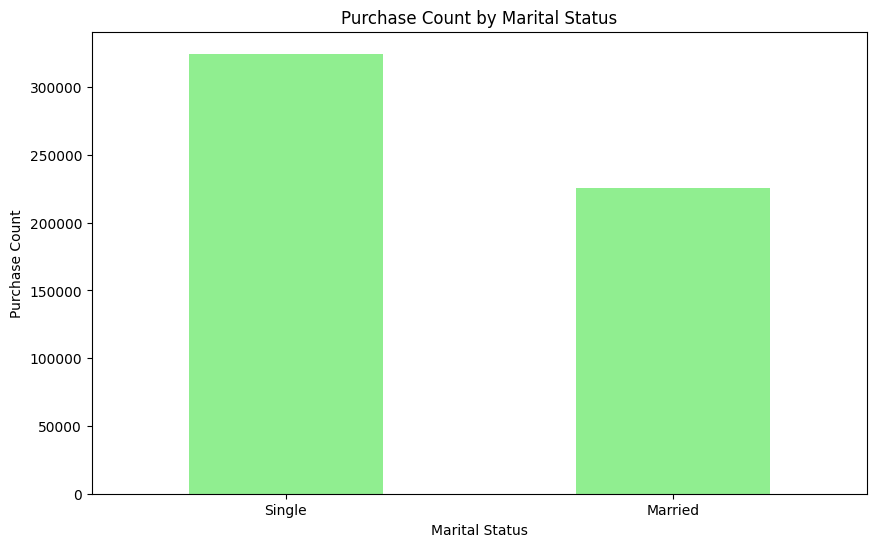

The marital status with the most purchases is: Single


In [12]:
#finding the most purchases by martial status

df['Marital_Status_Label'] = df['Marital_Status'].map({0: 'Single', 1: 'Married'})
marital_status_purchases = df['Marital_Status_Label'].value_counts()
plt.figure(figsize=(10, 6))
marital_status_purchases.plot(kind='bar', color='lightgreen')
plt.title('Purchase Count by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Purchase Count')
plt.xticks(rotation=0)
plt.show()

most_purchased_marital_status = marital_status_purchases.idxmax()
print(f"The marital status with the most purchases is: {most_purchased_marital_status}")



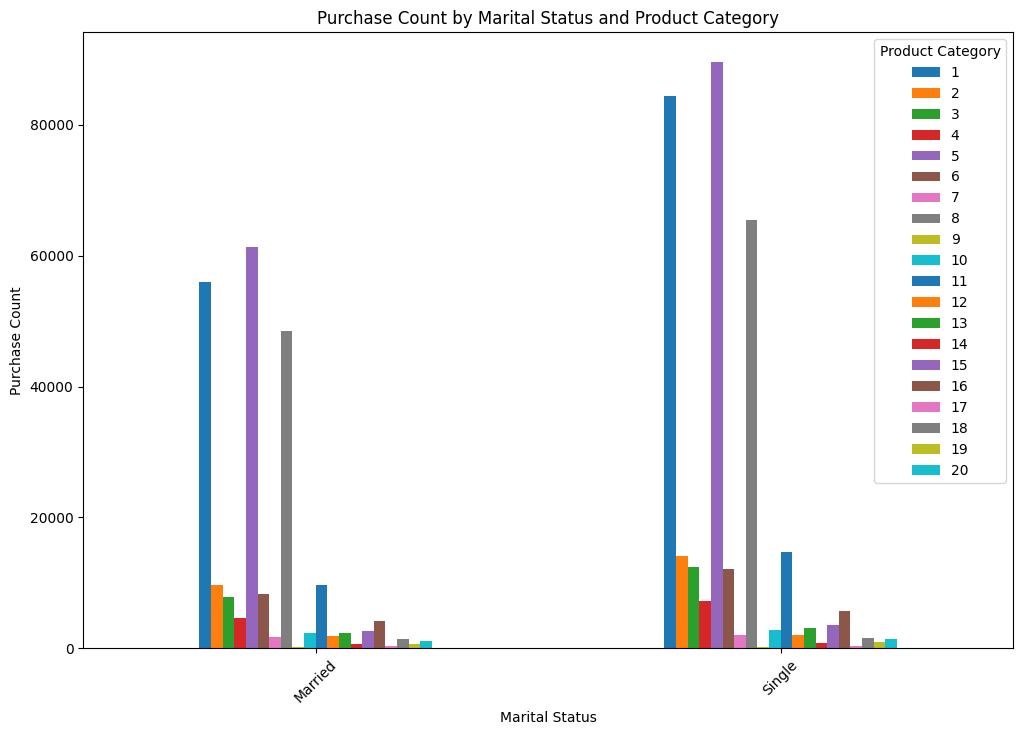

The marital status and product category with the most purchases is: ('Single', 5)


In [13]:
#finding the most purchases groupby marital status and product category
df['Marital_Status_Label'] = df['Marital_Status'].map({0: 'Single', 1: 'Married'})
marital_status_product_purchases = df.groupby(['Marital_Status_Label', 'Product_Category'])['Purchase'].count().unstack()
marital_status_product_purchases.plot(kind='bar', figsize=(12, 8))
plt.title('Purchase Count by Marital Status and Product Category')
plt.xlabel('Marital Status')
plt.ylabel('Purchase Count')
plt.xticks(rotation=45)
plt.legend(title='Product Category')
plt.show()

most_purchased_combination = marital_status_product_purchases.stack().idxmax()
print(f"The marital status and product category with the most purchases is: {most_purchased_combination}")


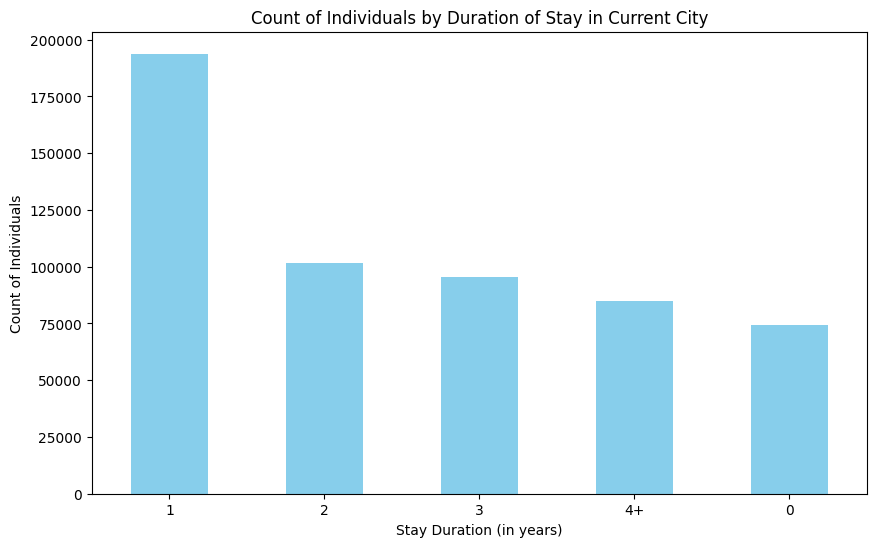

The most common duration of stay in the current city is: 1 year


In [14]:
#finding the person who most stayed in current city 

stay_duration_count = df['Stay_In_Current_City_Years'].value_counts()

plt.figure(figsize=(10, 6))
stay_duration_count.plot(kind='bar', color='skyblue')
plt.title('Count of Individuals by Duration of Stay in Current City')
plt.xlabel('Stay Duration (in years)')
plt.ylabel('Count of Individuals')
plt.xticks(rotation=0)
plt.show()


most_common_duration = stay_duration_count.idxmax()
print(f"The most common duration of stay in the current city is: {most_common_duration} year")
